In [1]:
import deepSI
import numpy as np

## Data generation of a symple system:

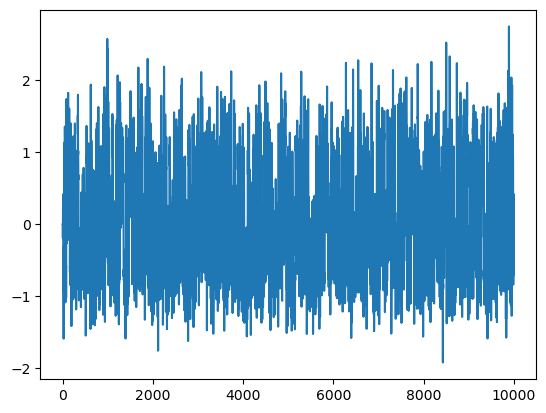

u [-0.46689114  0.95601188 -0.2023728   0.25975532 -0.23526718  0.04641961
 -0.10765562  0.08761514 -1.35986096 -0.35092668]
y [ 0.          0.         -0.19734435  0.10590882  0.16398504  0.29804727
  0.3242225   0.3777283   0.41148033  0.41566246]


In [2]:
N = 10_000
ulist = np.random.normal(size=N) #input sequence
ylist = []
x = [0,0]
for uk in ulist:
    yk = x[1]*x[0]*0.1 + x[0]
    ylist.append(yk)
    
    x = x[0]/(1.2+x[1]**2) + x[1]*0.4, x[1]/(1.2+x[0]**2)+x[0]*0.4+uk*(1+x[0]**2/10)

    
ylist = np.array(ylist)
#show results
from  matplotlib import pyplot as plt
plt.plot(ylist)
plt.show()

print('u',ulist[:10])
print('y',ylist[:10])

## Putting the IO data to a `System_data` such that it can be used with `deepSI`. 

System_data of length: 10000 nu=None ny=None normed=False dt=None


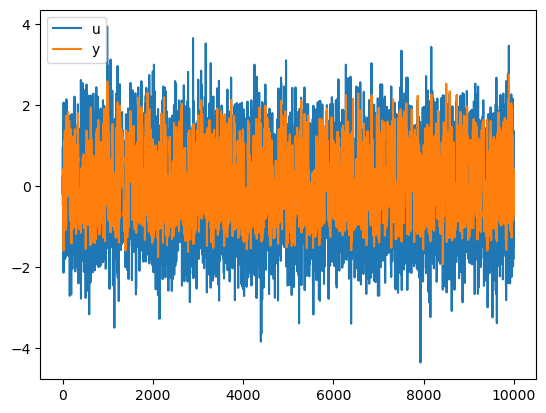

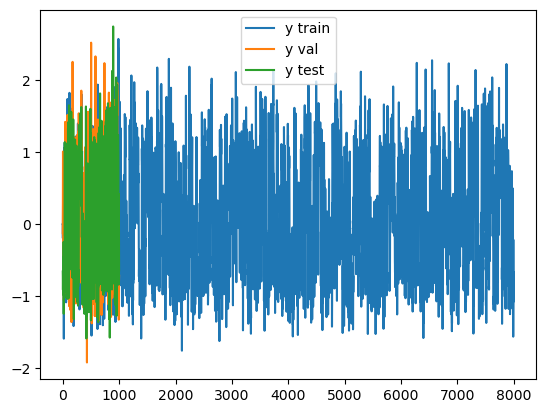

In [3]:
import deepSI
from deepSI import System_data
system_data = System_data(u=ulist,y=ylist)
print(system_data) #contains both the input and the output
plt.plot(system_data.u) #system_data.y contains the output array of length N
plt.plot(system_data.y) #system_data.u contains the input  array of length N
plt.legend(['u','y'])
plt.show()

train, val, test = system_data[:8000], system_data[8000:9000], system_data[9000:] #slice the datatset in two (or use system_data.train_test_split(split_fraction=0.2))
plt.plot(train.y,label='y train')
plt.plot(val.y, label='y val')
plt.plot(test.y,label='y test')
plt.legend()
plt.show()

## LPV SUBNET:

In [5]:
from deepSI.fit_systems import LPV_SUBNET_externally_scheduled, LPV_SUBNET_internally_scheduled

In the paper: Verhoek, C., Beintema, G. I., Haesaert, S., Schoukens, M., & Tóth, R. (2022, December). Deep-learning-based identification of LPV models for nonlinear systems. In 2022 IEEE 61st Conference on Decision and Control (CDC) (pp. 3274-3280). IEEE. 

There are two different LPV models given:

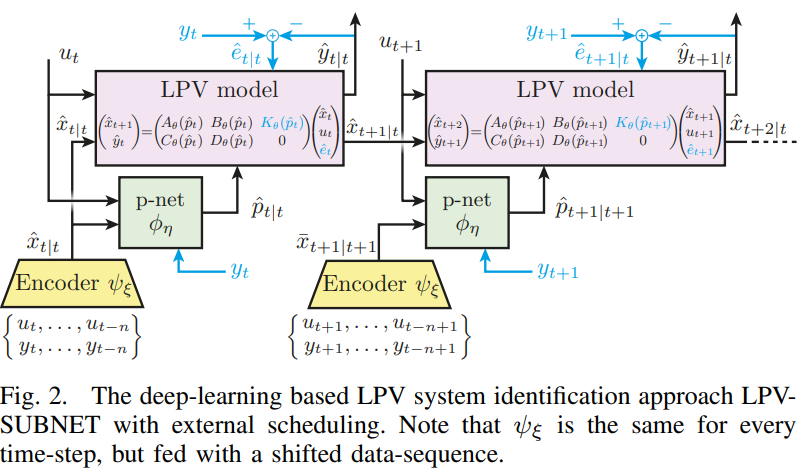

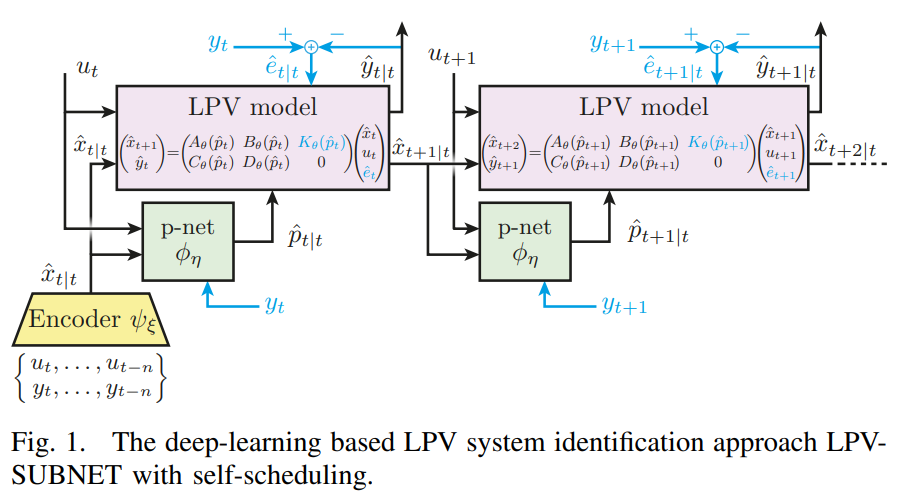

Some important notes with respect to the paper:

* The encoder is independent of the current input and current output. i.e. `[u_{t-1}, u_{t-2}, ..., u_{t-n_b}, y_{t-1}, y_{t-2}, ..., y_{t-n_a}]` are the inputs for the encoder
* The blue parts are not implemented (set to zero/independent p-net) since they encode for innovation noise and that is in the systems that we considered not significant. 
* The externally scheduled LPV SUBNET model has two operation modes when running a simulation: (applying the inputs in sequentially)
  1. As shown (externally scheduled) (`use_predicted_output_for_encoder=False`)
  2. Where the predicted output gets added to the input of the encoder. (`use_predicted_output_for_encoder=True`)
* 1. is not a true simulation since the real future outputs are used, hence 2 is preferred when reporting simulation accuracy.
* `scheduling_network_dependent_on_current_input` is a kwarg of both models model which sets that p-net dependent is not u or not. 
* If you aim to export the estimated models please check out `Example 2; Datsets and custom models.ipynb` since you need to also export the input and output normalization.
* The structure has only been verified to work with SISO (Single input single output)

In [6]:
model_ext = LPV_SUBNET_externally_scheduled(nx = 2, na=10, nb=10, scheduling_dim=1, feedthrough=True) #with K =0 and pnet indepedent of y_{t+1}
model_int = LPV_SUBNET_internally_scheduled(nx = 2, na=10, nb=10, scheduling_dim=1, feedthrough=True)

In [7]:
model_ext.fit(train, val)

Initilizing the model and optimizer
Size of the training array =  4.3 MB
N_training_samples = 7966, batch_size = 256, N_batch_updates_per_epoch = 31
INFO: applying the input the LPV SUBNET model with use_predicted_output_for_encoder=False
Initial Validation sim-NRMS= 1.006720961901456


  0%|          | 0/30 [00:00<?, ?it/s]

INFO: applying the input the LPV SUBNET model with use_predicted_output_for_encoder=False
########## New lowest validation loss achieved ########### sim-NRMS = 0.9978760642398808
Epoch    1, sqrt loss  0.9957, Val sim-NRMS 0.9979, Time Loss: 83.1%, data: 0.3%, val: 16.5%,  3.0 batches/sec
INFO: applying the input the LPV SUBNET model with use_predicted_output_for_encoder=False
########## New lowest validation loss achieved ########### sim-NRMS = 0.8013363075266017
Epoch    2, sqrt loss  0.9318, Val sim-NRMS 0.8013, Time Loss: 83.6%, data: 0.4%, val: 16.0%,  3.8 batches/sec
INFO: applying the input the LPV SUBNET model with use_predicted_output_for_encoder=False
########## New lowest validation loss achieved ########### sim-NRMS = 0.5828634770169275
Epoch    3, sqrt loss  0.7609, Val sim-NRMS 0.5829, Time Loss: 81.5%, data: 0.4%, val: 18.1%,  4.7 batches/sec
INFO: applying the input the LPV SUBNET model with use_predicted_output_for_encoder=False
########## New lowest validation loss ac

In [8]:
model_int.fit(train, val)

Initilizing the model and optimizer
Size of the training array =  4.3 MB
N_training_samples = 7966, batch_size = 256, N_batch_updates_per_epoch = 31
Initial Validation sim-NRMS= 1.0086422034381173


  0%|          | 0/30 [00:00<?, ?it/s]

########## New lowest validation loss achieved ########### sim-NRMS = 1.0037191681244182
Epoch    1, sqrt loss  0.9992, Val sim-NRMS  1.004, Time Loss: 75.7%, data: 0.5%, val: 23.9%, 13.9 batches/sec
########## New lowest validation loss achieved ########### sim-NRMS = 1.0007266920612103
Epoch    2, sqrt loss  0.9847, Val sim-NRMS  1.001, Time Loss: 76.9%, data: 0.3%, val: 22.8%, 13.0 batches/sec
########## New lowest validation loss achieved ########### sim-NRMS = 0.7440029762859593
Epoch    3, sqrt loss    0.92, Val sim-NRMS  0.744, Time Loss: 77.2%, data: 0.3%, val: 22.5%, 13.4 batches/sec
########## New lowest validation loss achieved ########### sim-NRMS = 0.579064473959266
Epoch    4, sqrt loss  0.6884, Val sim-NRMS 0.5791, Time Loss: 77.2%, data: 0.3%, val: 22.5%, 13.6 batches/sec
########## New lowest validation loss achieved ########### sim-NRMS = 0.518003913085424
Epoch    5, sqrt loss  0.5207, Val sim-NRMS  0.518, Time Loss: 77.1%, data: 0.3%, val: 22.6%, 13.4 batches/sec
##

In [9]:
test_ext_pure_sim = model_ext.apply_experiment(test, use_predicted_output_for_encoder=True)
test_ext_nonpure_sim = model_ext.apply_experiment(test, use_predicted_output_for_encoder=False)
test_int = model_int.apply_experiment(test)

INFO: applying the input the LPV SUBNET model with use_predicted_output_for_encoder=True
INFO: applying the input the LPV SUBNET model with use_predicted_output_for_encoder=False


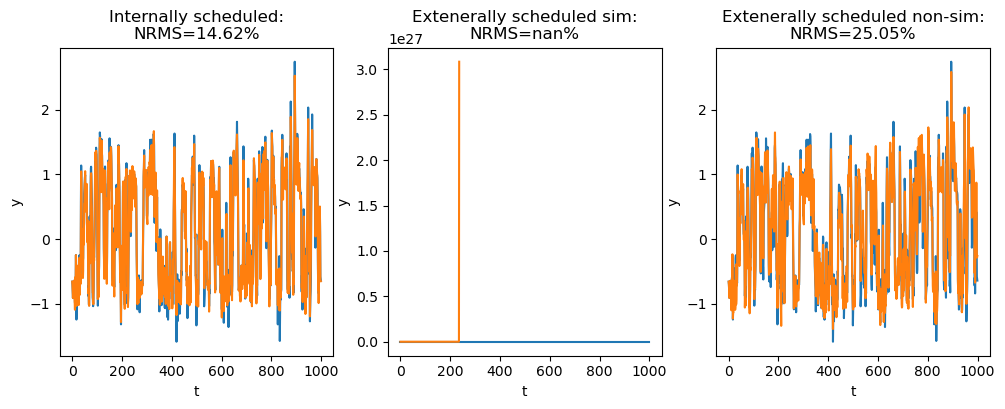

In [10]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
test.plot()
test_int.plot()
plt.title(f'Internally scheduled:\nNRMS={test_int.NRMS(test):.2%}')
plt.subplot(1,3,2)
test.plot()
test_ext_pure_sim.plot()
plt.title(f'Extenerally scheduled sim:\nNRMS={test_ext_pure_sim.NRMS(test):.2%}')
plt.subplot(1,3,3)
test.plot()
test_ext_nonpure_sim.plot()
plt.title(f'Extenerally scheduled non-sim:\nNRMS={test_ext_nonpure_sim.NRMS(test):.2%}')
plt.show()

Since the ext model was not trained in simulation mode it can sometimes explode when switching to it. 